In [2]:
import lasio
import numpy as np
import matplotlib.pyplot as plt

In [3]:
Welllogs = lasio.read("1044034903.las")
print(Welllogs.curves)

Mnemonic  Unit  Value  Description                   
--------  ----  -----  -----------                   
DEPT      F            DEPTH                         
CALI      IN           CALIPER                       
SGR       GAPI         SPECTR.GAMMA-RAY              
CGR       GAPI         COMPUTED GAMMA-RAY            
POTA      DEC          POTASSIUM                     
THOR      PPM          THORIUM                       
URAN      PPM          URANIUM                       
DPHZ      PERC         DENSITY POROSITY (LS EQUIV.)  
PEF       B/E          PHOTOELECTRIC FACTOR          
NPOR      PERC         NEUTRON POROSITY (LS EQUIV.)  
ILD       OHMM         DEEP INDUCTION RESISTIVITY    
HMNO      OHMM         MICRONORMAL RESISTIVITY       
HMIN      OHMM         MICROINVERSE RESISTIVITY      


In [4]:
for curve in Welllogs.curves:
    print(curve.mnemonic + ":" + str(Welllogs.data))

DEPT:[[ 450.      3.5   116.   ...    5.41    4.59    4.1 ]
 [ 450.5     3.5   115.1  ...    5.33    4.51    4.11]
 [ 451.      3.5   114.1  ...    5.22    4.44    4.12]
 ...
 [1459.      3.25  131.7  ...    3.38    2.92    2.55]
 [1459.5     3.24  136.5  ...    3.77    3.02    2.65]
 [1460.      3.24  135.5  ...    3.56    3.17    3.14]]
CALI:[[ 450.      3.5   116.   ...    5.41    4.59    4.1 ]
 [ 450.5     3.5   115.1  ...    5.33    4.51    4.11]
 [ 451.      3.5   114.1  ...    5.22    4.44    4.12]
 ...
 [1459.      3.25  131.7  ...    3.38    2.92    2.55]
 [1459.5     3.24  136.5  ...    3.77    3.02    2.65]
 [1460.      3.24  135.5  ...    3.56    3.17    3.14]]
SGR:[[ 450.      3.5   116.   ...    5.41    4.59    4.1 ]
 [ 450.5     3.5   115.1  ...    5.33    4.51    4.11]
 [ 451.      3.5   114.1  ...    5.22    4.44    4.12]
 ...
 [1459.      3.25  131.7  ...    3.38    2.92    2.55]
 [1459.5     3.24  136.5  ...    3.77    3.02    2.65]
 [1460.      3.24  135.5  ...    3

In [11]:
dataframe = Welllogs.df().reset_index()
dataframe.head()

,DEPT,CALI,SGR,CGR,POTA,THOR,URAN,DPHZ,PEF,NPOR,ILD,HMNO,HMIN
0,450.0,3.5,116.0,98.1,0.033,10.61,2.38,25.29,3.144,39.54,5.41,4.59,4.10
1,450.5,3.5,115.1,96.0,0.033,10.55,2.49,25.59,3.180,40.03,5.33,4.51,4.11
2,451.0,3.5,114.1,97.4,0.033,10.49,2.51,25.87,3.197,39.68,5.22,4.44,4.12
3,451.5,3.5,113.1,96.6,0.033,10.44,2.39,26.40,3.197,38.65,5.11,4.36,4.14
4,452.0,3.5,113.1,95.9,0.033,10.39,2.45,26.76,3.197,38.94,5.06,4.24,4.02


In [12]:
dataframe.tail()

,DEPT,CALI,SGR,CGR,POTA,THOR,URAN,DPHZ,PEF,NPOR,ILD,HMNO,HMIN
2016,1458.0,3.25,120.1,46.1,0.020,5.45,10.46,28.65,3.981,37.23,3.36,3.07,2.15
2017,1458.5,3.24,124.5,48.6,0.020,5.76,10.51,29.42,3.985,36.72,3.34,3.02,2.59
2018,1459.0,3.25,131.7,51.2,0.022,6.06,10.62,30.34,3.997,36.21,3.38,2.92,2.55
2019,1459.5,3.24,136.5,54.1,0.023,6.33,10.57,31.03,3.943,36.17,3.77,3.02,2.65
2020,1460.0,3.24,135.5,56.5,0.023,6.50,10.54,30.14,3.823,36.85,3.56,3.17,3.14


In [13]:
dataframe.describe()['CGR']

count    2021.000000
mean       89.870708
std        24.115788
min        16.300000
25%        89.600000
50%        98.700000
75%       104.500000
max       130.300000
Name: CGR, dtype: float64

In [14]:
dataframe.describe()["CALI"]

count    2021.000000
mean        3.508793
std         0.135149
min         2.650000
25%         3.480000
50%         3.520000
75%         3.540000
max         5.050000
Name: CALI, dtype: float64

In [15]:
dataframe.CALI.max().dtype

dtype('float64')

In [16]:
top_form = ('Sharon Springs', "Niobrara", "Beecher Island")
top_depths = (1078, 1248, 1281)

In [17]:
# minim = dataframe.DEPT.min()
# maxim = dataframe.DEPT.max()
# logsdata = dataframe[(dataframe.DEPT >= minim) & (dataframe.DEPT <= maxim)]
# logsdata

In [21]:
#1st track : SGR, CGR, CALI
#2nd track : Resistivities (ILD, HMNO, HMIN)
#3rd track : Density, Sonic, and Neutronic


def plotting(atas, bawah):
    logsdata = dataframe[(dataframe.DEPT >= atas) & (dataframe.DEPT <= bawah)]
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,10), sharey=True)
    fig.suptitle("Specific Well--15-181-20369 (Well Composite)", fontsize=22)
    fig.subplots_adjust(top=0.75, wspace=0.1)

    for axes in ax:
        axes.set_ylim(atas, bawah)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False)
        for i, j in zip(top_depths, top_form):
            #print(f"i: {i} (type: {type(i)}), j: {j} (type: {type(j)})")
            #print(f"atas: {atas} (type: {type(atas)}), bawah: {bawah} (type: {type(bawah)})")
            if isinstance(i, (int, float)) and isinstance(atas, (int, float)) and isinstance(bawah, (int, float)):
                if i >= atas and i <= bawah:
                    axes.axhline(y=i, linewidth= 1.5, color="black")
                    x_outside = axes.get_xlim()[1]
                    axes.text(x_outside + 0.1, i, j, horizontalalignment="left", verticalalignment="center")
                    #axes.text(0.1, i, j, horizontalalignment="center", verticalalignment="top")
        # for (i,j) in zip(top_depths, top_form):
        #     if((i>=atas) and (j<=bawah)):
        #         axes.axhline(y=i, linewidth=0.5, color = "black")
        #         axes.text(0.1, i, j, horizontalalignment="center", verticalalignment="center")

        #Track 1 SGR, CGR, CALI
        
        ax01 = ax[0].twiny()
        ax01.set_xlim(1, 6)
        ax01.spines['top'].set_position(('outward',0))
        ax01.set_xlabel("CALI[In]")
        ax01.plot(logsdata.CALI, logsdata.DEPT, '--', label="CALI[In]", color="black")
        ax01.set_xlabel("CALI[In]", color="black")
        ax01.tick_params(axis='x', color='black')
        ax01.grid(True)

        ax02 = ax[0].twiny()
        ax02.set_xlim(0, 400)
        ax02.spines['top'].set_position(('outward',40))
        ax02.set_xlabel("SGR[API]")
        ax02.plot(logsdata.SGR, logsdata.DEPT, label="SGR[API]", color="red")
        ax02.set_xlabel("SGR[API]", color="red")
        ax02.tick_params(axis='x', color='red')

        ax03 = ax[0].twiny()
        ax03.set_xlim(0, 150)
        ax03.spines['top'].set_position(('outward',80))
        ax03.set_xlabel("CGR[API]")
        ax03.plot(logsdata.CGR, logsdata.DEPT, label="CGR[API]", color="green")
        ax03.set_xlabel("CGR[API]", color="green")
        ax03.tick_params(axis='x', color='green')


        #Track 2 Resistivities (ILD, HMNO, HMIN)
        ax11 = ax[1].twiny()
        ax11.set_xlim(0.1, 100)
        ax11.set_xscale("log")
        ax11.grid(True)
        ax11.spines['top'].set_position(('outward', 80))
        ax11.set_xlabel("ILD[m.ohm]", color="red")
        ax11.plot(logsdata.ILD, logsdata.DEPT, label='ILD[m.ohm]', color='red')
        ax11.tick_params(axis='x', colors='red')  
        
        ax12 = ax[1].twiny()
        ax12.set_xlim(0.1, 100)
        ax12.set_xscale("log")
        ax12.spines['top'].set_position(('outward', 40))
        ax12.set_xlabel("HMNO[m.ohm]", color="purple")
        ax12.plot(logsdata.HMNO, logsdata.DEPT, label='HMNO[m.ohm]', color='purple')
        ax12.tick_params(axis='x', colors='purple')

        ax13 = ax[1].twiny()
        ax13.set_xlim(0.1, 100)
        ax13.set_xscale("log")
        ax13.spines['top'].set_position(('outward', 0))
        ax13.set_xlabel("HMIN[m.ohm]", color="black")
        ax13.plot(logsdata.HMIN, logsdata.DEPT, label='HMIN[m.ohm]', color='black')
        ax13.tick_params(axis='x', colors='black')

        #track 3 Density Porosity (DPHZ), NEutron Porosity (NPOR), Photoelectric Factor (B/E)

        ax21 = ax[2].twiny()
        #ax13.set_xlim(0.1, 100)
        #ax13.set_xscale("log")
        ax21.grid(True)
        ax21.spines['top'].set_position(('outward', 0))
        ax21.set_xlabel("DPHZ[%]", color="blue")
        ax21.plot(logsdata.DPHZ, logsdata.DEPT, label='DPHZ[%]', color='blue')
        ax21.tick_params(axis='x', colors='blue')

        ax22 = ax[2].twiny()
        ax22.spines['top'].set_position(('outward', 40))
        ax22.set_xlabel("NPOR[%]", color="green")
        ax22.plot(logsdata.NPOR, logsdata.DEPT, label='NPOR[%]', color='green')
        ax22.tick_params(axis='x', colors='green')

        ax23 = ax[2].twiny()
        ax23.spines['top'].set_position(('outward', 80))
        ax23.set_xlabel("PEF[B/E]", color="red")
        ax23.plot(logsdata.PEF, logsdata.DEPT, label='PEF[B/E]', color='red')
        ax23.tick_params(axis='x', colors='red')
        

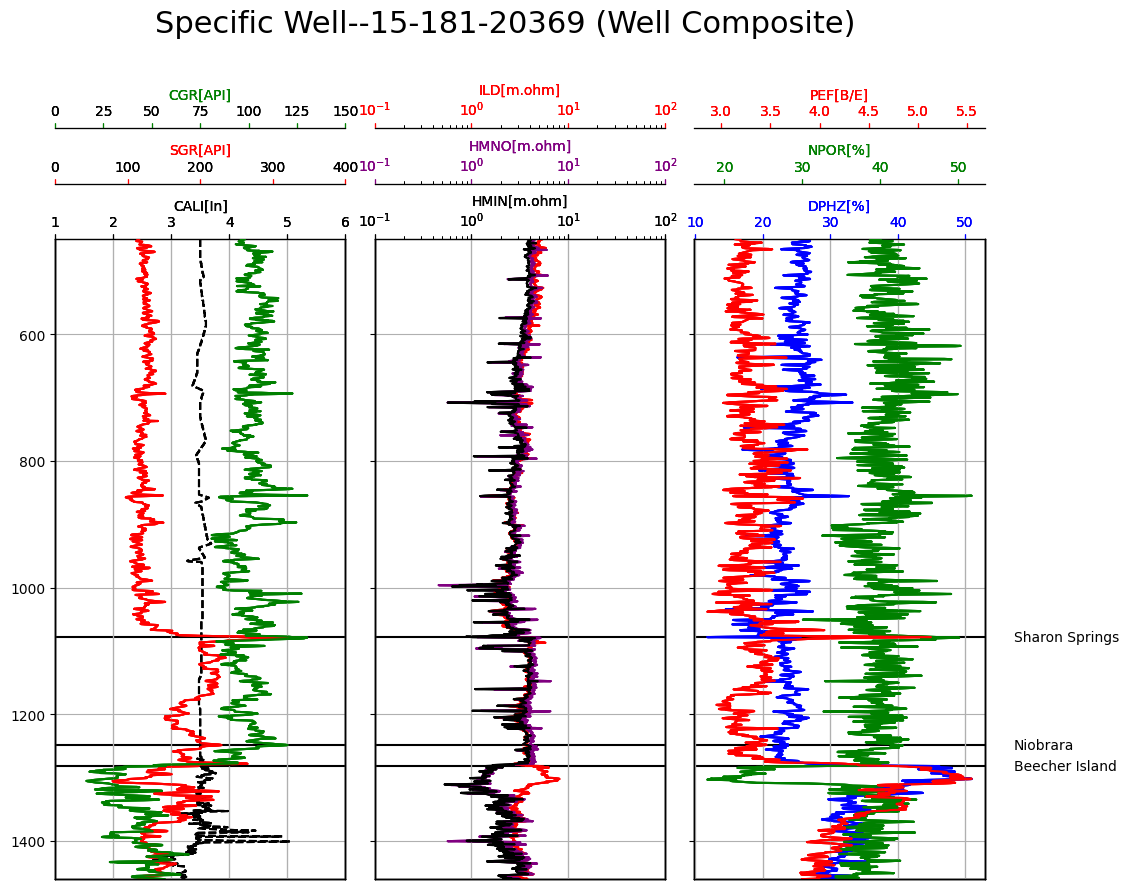

In [22]:
plotting(dataframe.DEPT.min(), dataframe.DEPT.max())

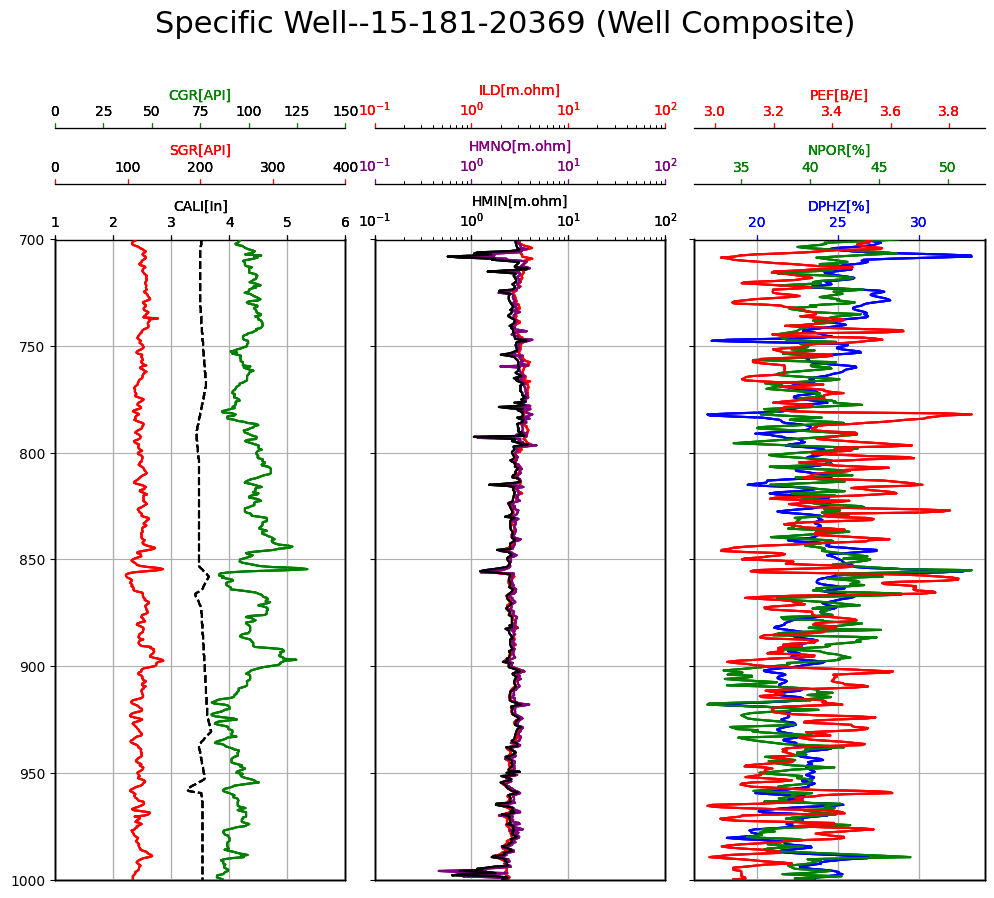

In [23]:
top_depth = 700
bot_depth = 1000

plotting(top_depth, bot_depth)